### Data Preprocessing
- 영상 데이터 전처리 

In [27]:
import seaborn as sns
import pandas as pd
# !pip install missingno
import missingno as msno
import numpy as np

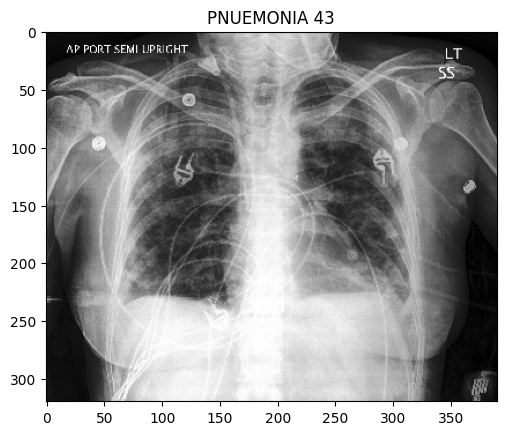

In [28]:
import os
import matplotlib.pyplot as plt

# !pip install opencv-python
import cv2

# data 경로 설정
data_dir = '../z20_data/pnuemonia/Pnuemonia/Positive/'
# categories = ['train','test','val'] # 전처리된 데이터셋을 훈련용, 평가용, 검증용으로 구분

# 샘플 이미지 시각화
img_name = os.listdir(data_dir)[42]
img_path = os.path.join(data_dir,img_name)
img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('PNUEMONIA 43')
plt.show()

#### 설치 라이브러리
<!-- pip install opencv-python -->

In [29]:
# !pip install opencv-python

### Image Resize

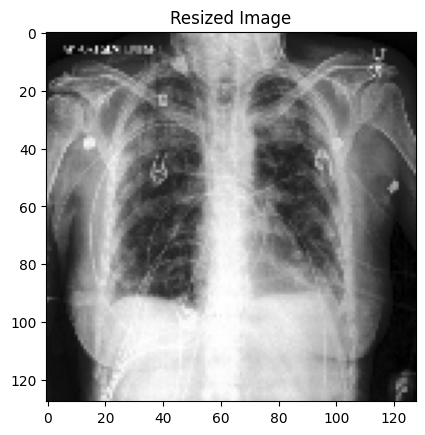

In [30]:
def resize_image(img,size=(128,128)):
    return cv2.resize(img,size)
resized_img = resize_image(img)
plt.imshow(resized_img,cmap='gray')
plt.title('Resized Image')
plt.show()

### Histogram Equalization
- image level 평활화 

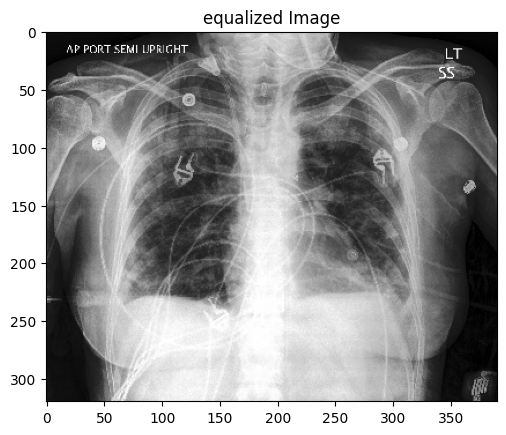

In [31]:
def he_img(img):
    return cv2.equalizeHist(img)

equalized_img = he_img(img)
plt.imshow(equalized_img,cmap='gray')
plt.title('equalized Image')
plt.show()

In [32]:
?cv2.equalizeHist

Docstring:
equalizeHist(src[, dst]) -> dst
.   @brief Equalizes the histogram of a grayscale image.
.   
.   The function equalizes the histogram of the input image using the following algorithm:
.   
.   - Calculate the histogram \f$H\f$ for src .
.   - Normalize the histogram so that the sum of histogram bins is 255.
.   - Compute the integral of the histogram:
.   \f[H'_i =  \sum _{0  \le j < i} H(j)\f]
.   - Transform the image using \f$H'\f$ as a look-up table: \f$\texttt{dst}(x,y) = H'(\texttt{src}(x,y))\f$
.   
.   The algorithm normalizes the brightness and increases the contrast of the image.
.   
.   @param src Source 8-bit single channel image.
.   @param dst Destination image of the same size and type as src .
Type:      builtin_function_or_method

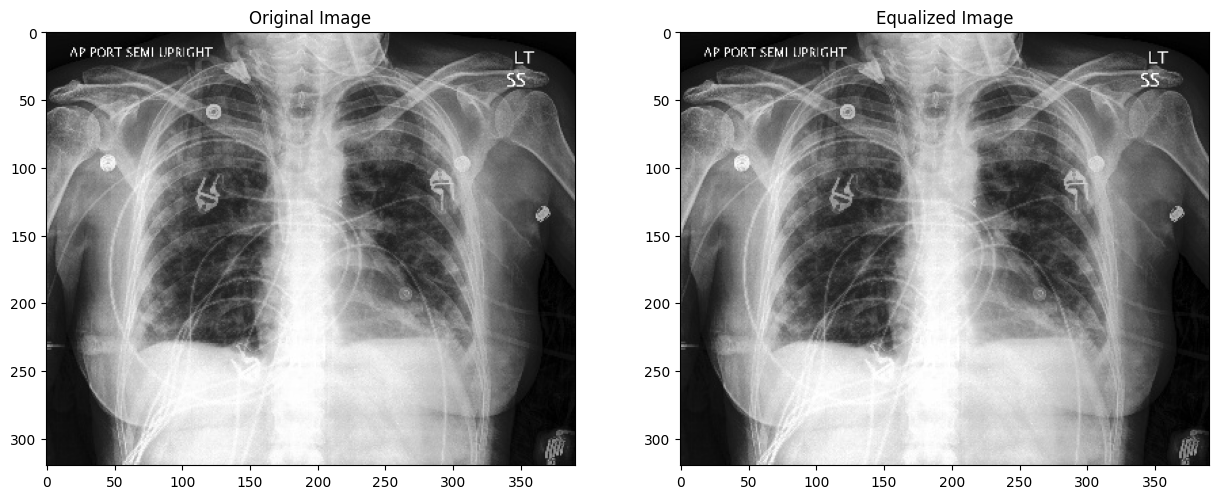

In [33]:
equalized_img = he_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

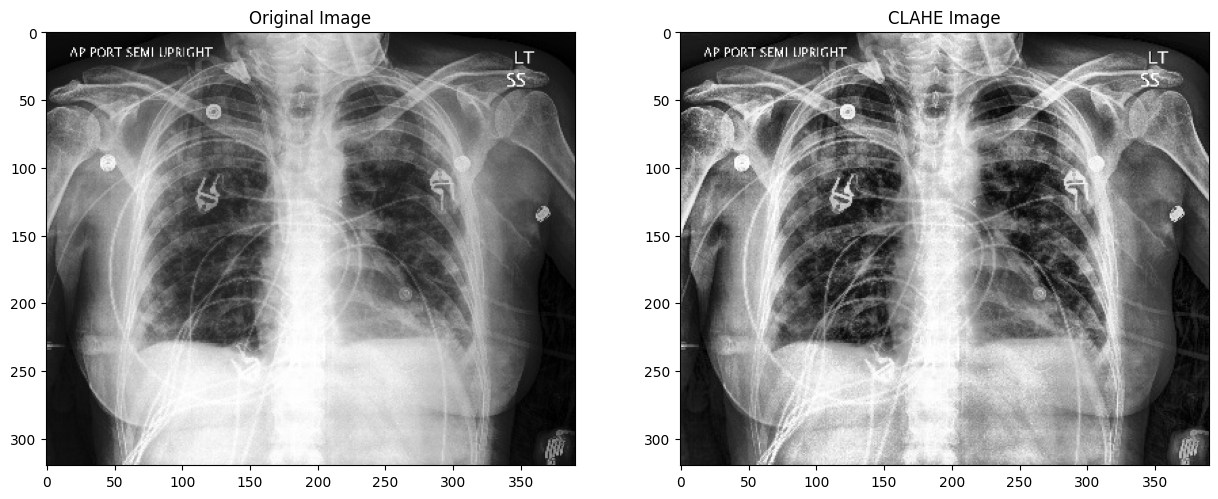

In [34]:
# Histogram Equalization CLAHE(Contrast Limited Adaptive Histogram Equalization)
def clahe_image(img):
    clahe = cv2.createCLAHE(clipLimit=2.,tileGridSize=(8,8))
    cl_img = clahe.apply(img)
    return cl_img

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(clahe_image(img), cmap='gray')
plt.title('CLAHE Image')
plt.show()

### Data Augmentation
- 데이터의 수를 증가시켜 학습, 평가용 데이터를 추가 확보 
- 데이터의 표본(n수)이 적을 때 주로 사용 

In [35]:
from tensorflow import keras
from keras.preprocessing.image import ImageGenerator

ImportError: cannot import name 'ImageGenerator' from 'keras.preprocessing.image' (c:\Users\KOREAVC\anaconda3\envs\proj\Lib\site-packages\keras\api\preprocessing\image\__init__.py)

### Noise Reduction 

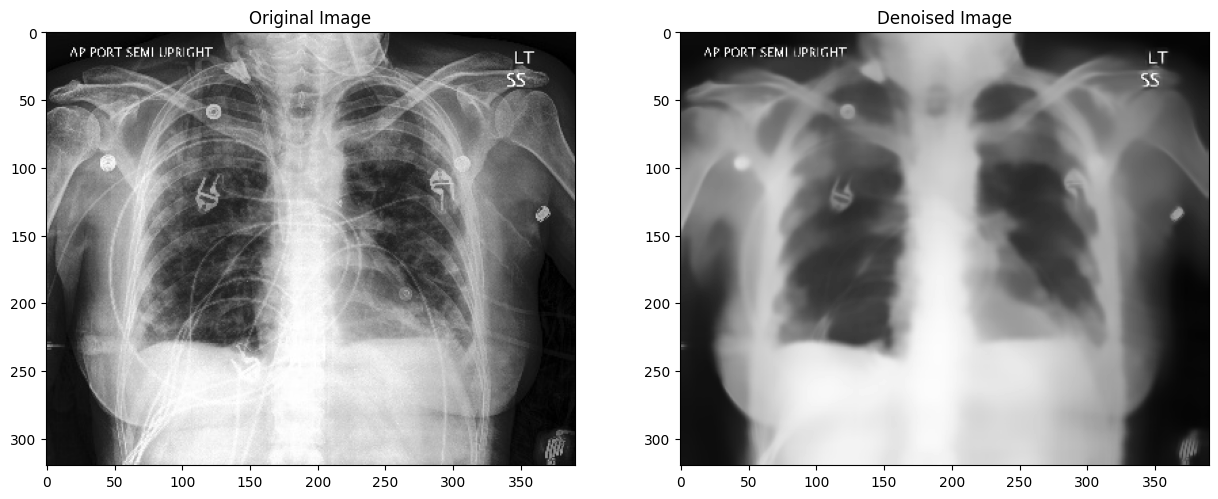

In [ ]:
def denoise_img(img):
    return cv2.fastNlMeansDenoising(img,None,30,7,21)

denoised_img = denoise_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised Image')
plt.show()

### Image Normalization 
- 데이터 정규화 처리
- 연산 효율 높이고 정규성을 생성 

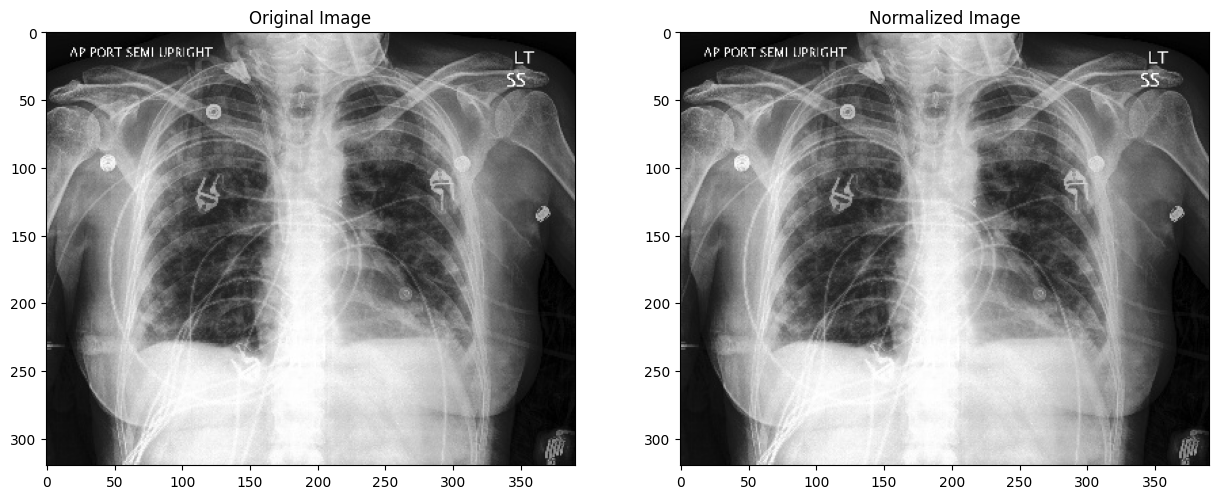

In [ ]:
def normalize_img(img):
    return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

normalized_img = normalize_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(normalized_img, cmap='gray')
plt.title('Normalized Image')
plt.show()

### Edge Detection 

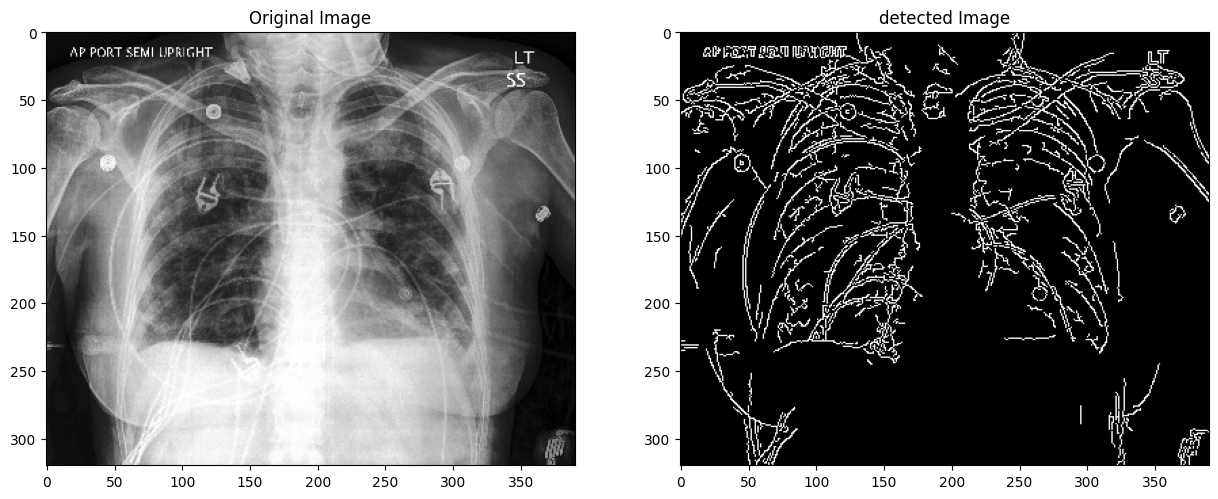

In [ ]:
def detect_edge(img):
    return cv2.Canny(img,100,200)

detected_img = detect_edge(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(detected_img, cmap='gray')
plt.title('detected Image')
plt.show()

### Blurring 

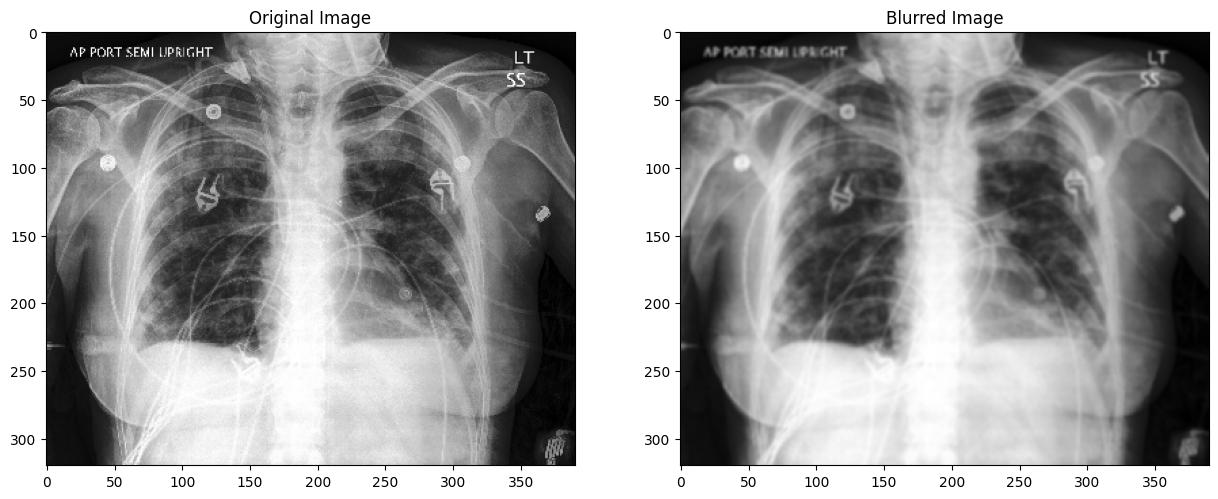

In [ ]:
def blur_img(img):
    return cv2.GaussianBlur(img,(5,5),0)

blurred_img = blur_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurred Image')
plt.show()

### Contour Detection 

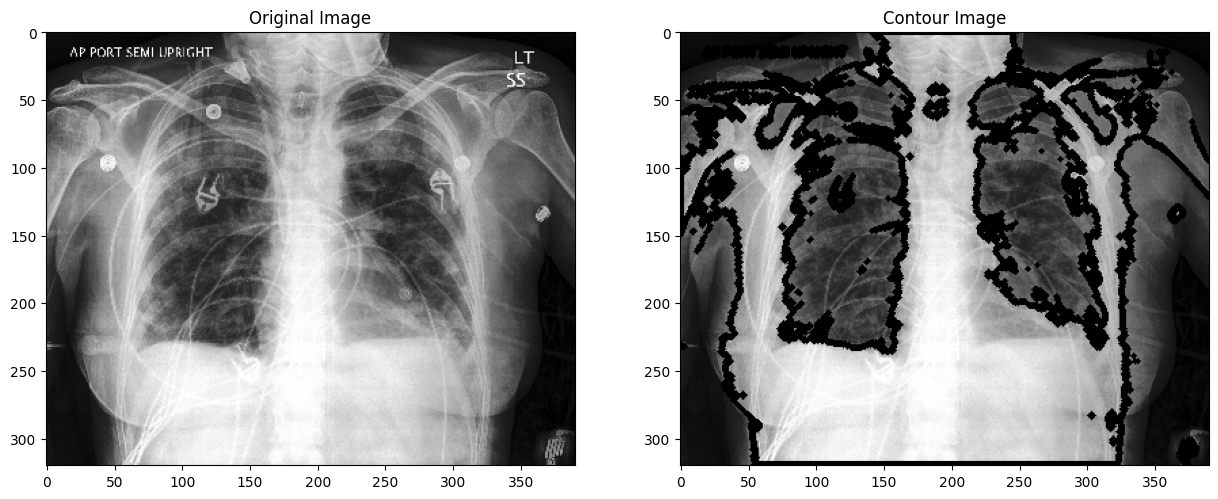

In [ ]:
def find_contour(img):
    ret,thresh = cv2.threshold(img,127,255,0)
    contours,hiearchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    return contours

contours = find_contour(img)
contour_img = cv2.drawContours(img.copy(),contours,-1,(0,255,0),3)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(contour_img, cmap='gray')
plt.title('Contour Image')
plt.show()

### Data Preparing 

In [36]:
def load_data(data_dir):
    images = []
    # labels = []
    for img_path in os.listdir(data_dir):
        img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img = resize_image(img)
        img = clahe_image(img)
        img = normalize_img(img)
        images.append(img)
        
    prepared_datas = np.array(images)
    return prepared_datas
            

In [ ]:
# %whos : 내가 쓴 식별자 확인할 수 있음
# %reset : 식별자 초기화
# %pwd : 내 폴더 확인

'c:\\workspace\\medical1\\p0604'